## "Exploring Zomato: A Data Analysis of Restaurant Trends and Consumer Preferences"

In [1]:
# import necessary libraries like numpy,pandas ,seaborn and matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# read the data from the csv file
df = pd.read_csv(r"C:\Users\Ashim\OneDrive\Desktop\zomato.csv",encoding="ISO-8859-1")

In [5]:
# read the data from the excel file
country_code = pd.read_excel(r"C:\Users\Ashim\OneDrive\Desktop\Country-Code.xlsx")

In [7]:
# display the first 5 rows of the data
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [8]:
# merge the two dataframes
merged_df = pd.merge(df,country_code,how="left",on="Country Code")
merged_df.head(3)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [9]:
# checking the missing values
merged_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

#### Analysis and Visualization of Exploratory Data Understanding the surrounding geographical spread, understanding the rating, understanding the currency, online delivery, city coverage, etc. will be beneficial before we ask questions about the dataset.

In [14]:
#let us check how many unique countries are there in the dataset
print("let us  seee how many country include in this survay")
for i in pd.unique(merged_df.Country): print(i)
print()
print("Total  nuber of country in this survey ", merged_df["Country"].nunique())


let us  seee how many country include in this survay
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total  nuber of country in this survey  15


 - Zomato is a transnational corporation with operations in these nations, as evidenced by the survey's finding that it is dispersed throughout 15 counties.

#### 1. Presently, let's discuss ratings.

In [17]:
merged_df1=merged_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'rating_count'})
merged_df1.head(10)

,Aggregate rating,Rating color,Rating text,rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


 - As seen above, we comprehend the connection between the aggregate rating, rating color, and rating text.<br> 
 - 0.0 = white
 - 1.8 - 2.4 = Red
 - 2.5 - 3.4 = Orange
 - 3.5 - 3.9 = Yellow
 - 4.0 - 4.4 = Green
 - 4.5 - 4.9 = Dark Green

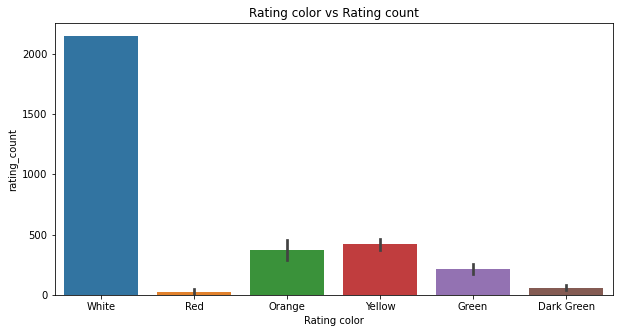

In [18]:
# plot the bar graph between rating color and rating count
plt.figure(figsize=(10,5))
sns.barplot(x="Rating color",y="rating_count",data=merged_df1)
plt.title("Rating color vs Rating count")
plt.show()


 - It appears that the majority of restaurants have not received any ratings, so let's check to see if they are located in a particular nation or not.

In [21]:
no_rating=merged_df[merged_df['Rating color']=='White'].groupby(merged_df.Country).size().reset_index().rename(columns={0:'rating_count'})
no_rating

,Country,rating_count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


 - India appears to have the most unrated restaurants, which suggests that, in Indian society, most people might prefer to eat at a restaurant.

### 2. countries and their currencies

In [23]:
country_with_currency=merged_df.groupby(['Country','Currency']).size().reset_index(name='count')
country_with_currency.drop(columns=['count'],axis=1,inplace=True)
country_with_currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


 - As can be seen, the majority of dollors used for internet food orders are from 4 countries.

### 3. Here, we attempt to use data frame operations and visualizations to respond to some specific queries.

#### Q1: Which locality has the most hotels mentioned on Zomato?

Text(0.5, 1.0, 'Resturents ')

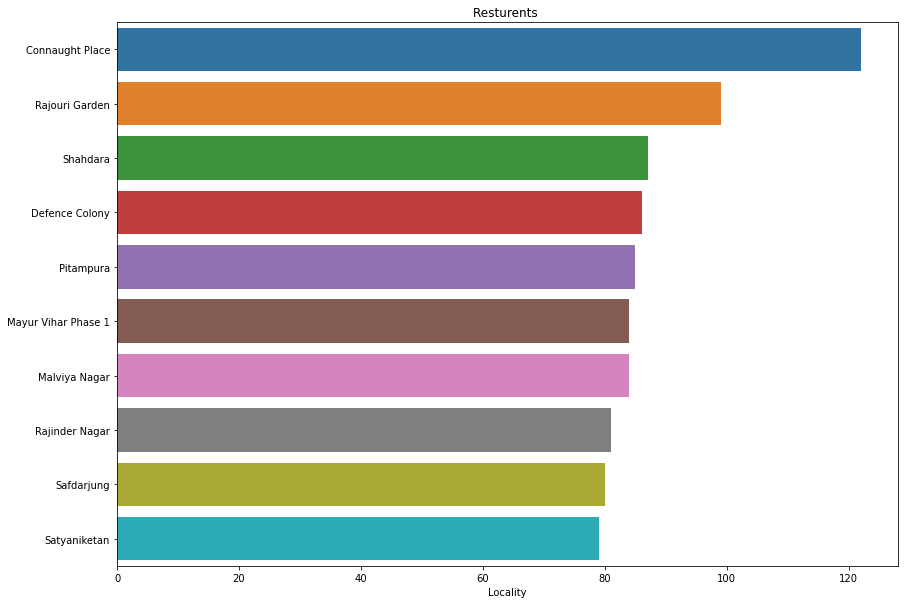

In [26]:
Delhi=merged_df[(merged_df.City=='New Delhi')]
plt.figure(figsize=(14,10))
sns.barplot(x=Delhi.Locality.value_counts().head(10),y=Delhi.Locality.value_counts().head(10).index)
plt.title('Resturents ')

 - Here, it appears that Connaught Place has the greatest number of restaurants.

#### Q2: What types of cuisine are served at these highly regarded establishments?

In [27]:
merged_df.Cuisines.value_counts()

North Indian                                     936
North Indian, Chinese                            511
Chinese                                          354
Fast Food                                        354
North Indian, Mughlai                            334
                                                ... 
American, Caribbean, Seafood                       1
Parsi, North Indian                                1
Beverages, Ice Cream                               1
Indian, Asian                                      1
Chinese, North Indian, Fast Food, Street Food      1
Name: Cuisines, Length: 1825, dtype: int64

In [29]:

from pandas.core.arrays.datetimelike import isin
good_resturent=Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]
good_resturent=good_resturent.Cuisines.value_counts().reset_index()

cuisines=[]
for x in good_resturent['index']:
  cuisines.append(x)
                  
cuisines

['North Indian, Chinese, Italian, Continental',
 'North Indian, Chinese',
 'North Indian, Afghani, Mughlai',
 'South Indian',
 'Ice Cream',
 'Modern Indian',
 'Healthy Food, Continental, Italian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'Continental, Italian, Asian, Indian',
 'Japanese',
 'Continental, Mediterranean, Italian, North Indian',
 'Asian, North Indian',
 'Fast Food, American, Burger',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Continental, American, Asian, North Indian',
 'Continental, North Indian, Chinese, Mediterranean',
 'Bakery, Fast Food, Desserts',
 'Chinese',
 'North Indian, European',
 'Cafe',
 'Bakery, Desserts, Fast Food',
 'North Indian, Continental',
 'North Indian, Italian, Asian, American',
 'Biryani, Hyderabadi',
 'North Indian, Chinese, Continental, Italian',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Biryani, North Indian, Hyderabadi',
 'North India

In [ ]:
# As we here we use text classiffications technique
# import the necessary libraries

! pip install wordcloud spacy
import nltk
import wordcloud
nltk.download('stopwords')
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords


en_stop_words = list(set(stopwords.words('english')).union(set(STOP_WORDS)))

comment_word=' '
stopword=set(en_stop_words)


for val in cuisines:
  val=str(val)
  token=val.split()

  for i in range (len(token)):
    token[i]=token[i].lower()

  comment_word += " ".join(token)+" "


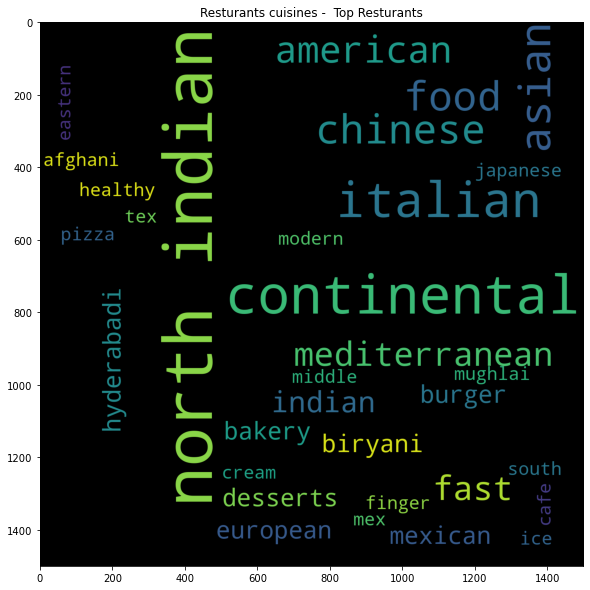

In [41]:
#create word cloud and print it 
wordcloud = WordCloud(width = 1500, height = 1500,background_color ='black',stopwords = stopword,min_font_size = 10).generate(comment_word)
plt.figure(figsize=(10,10))
plt.title('Resturants cuisines -  Top Resturants')
plt.imshow(wordcloud)
plt.show()

 - Top rated resurents are doing well in cuisines of
 - North Indian
 - Chinese
 - Italian
 - American

####  3. How many of these eateries offer internet delivery?

<AxesSubplot:title={'center':'Resturants Online Delivery'}, xlabel='count', ylabel='Locality'>

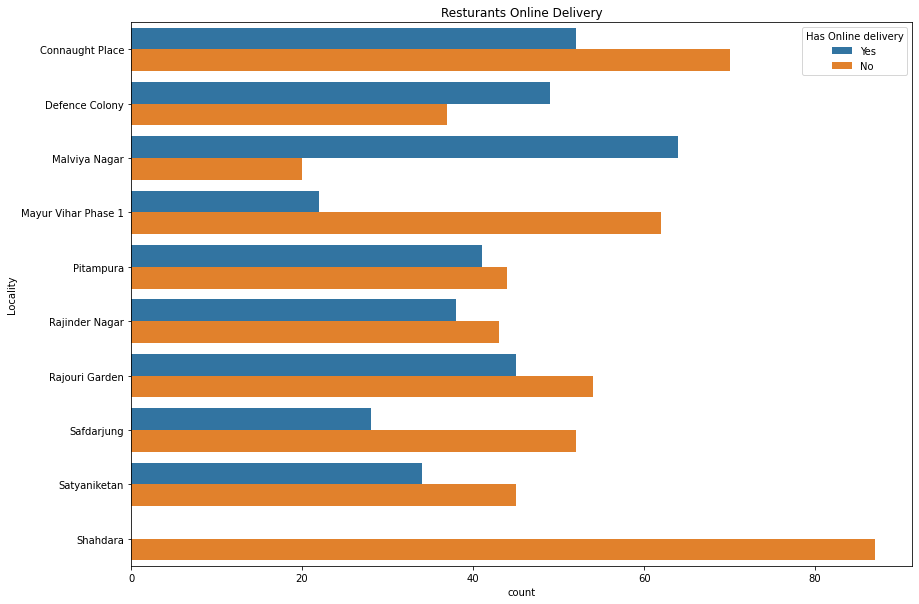

In [45]:
top_locality=Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(14,10))
plt.title('Resturants Online Delivery')
sns.countplot(y="Locality", data=Delhi[Delhi.Locality.isin(top_locality.index)],hue='Has Online delivery')

 - We depict from the graph that except Shahdara every place offer the online delivery

#### Q4: Rating VS Cost of dinning

<AxesSubplot:title={'center':'Rating vs Cost of Two'}, xlabel='Average Cost for two', ylabel='Aggregate rating'>

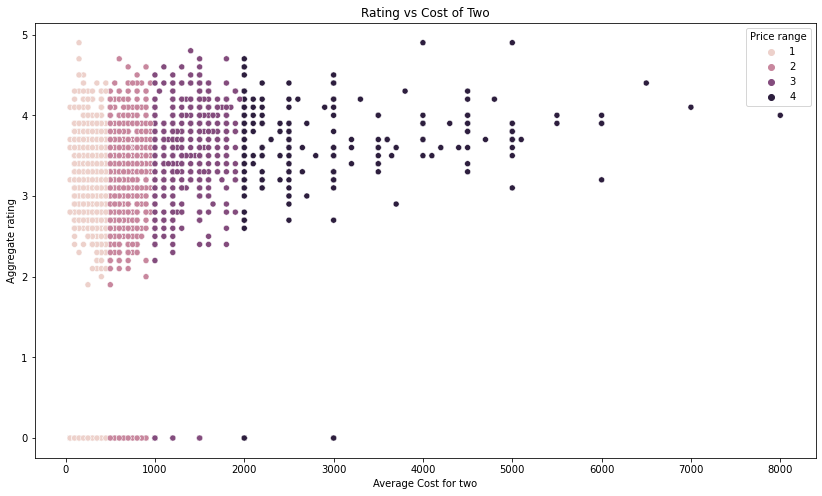

In [46]:
plt.figure(figsize=(14,8))
plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');
sns.scatterplot(x='Average Cost for two' , y='Aggregate rating',hue='Price range',data=Delhi)